# Pymaceuticals Inc.
---

# Analysis

1. As seen from the bar graph,the drug Capmulin is tested on maximum number of mice(230) followed by Ramicane(228). The least used drug is Propiva used only on 148 mice.

2. The male and female population is evenly distributed. The percentage of female mice is 49% while the male population is 51%.

3. The box plot shows that the drug 'Infubinol' has some outliers. Capmulin and Ramicane seem to be more effective for the treatment.The mean and median tumor volume is lowest for drugs Capmulin and Ramicane. The SEM values are also lower for these two drugs.

4. The line graph shows higher the timepoint, lower is the tumor volume for the mouse with ID l509. This is true when Capmulin was used.

5.  The correlation coefficient for the entire Capmulin regimen is 0.84. This shows that weight(g) is realted to the tumor volume. Higher the weight of the mice, higher is the tumor volume.

6. The regression analysis shows how the average tumor volume(dependent variable) changes with the weight of the mouse(dependent variable). The slope shows the positive relation betweem them. As the weight (g) increases, the tumor volume also increases. Using the line equation, we can estimate the tumor volume(mm3) for the given weight of the mice.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(mouse_metadata,study_results,how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_data.shape
combined_data.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1871,z581,Infubinol,Female,24,25,40,60.053740,3
451,y449,Ramicane,Male,19,24,5,45.877545,0
610,b559,Naftisol,Male,20,26,45,73.051363,1
158,t565,Capomulin,Female,20,17,15,44.440949,0
250,i334,Ramicane,Female,8,20,25,38.248817,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
1396,q132,Infubinol,Female,1,30,25,52.780489,4
1447,r107,Propriva,Female,2,28,10,49.186011,0
1041,k382,Ketapril,Male,22,29,35,66.079185,4
216,w914,Capomulin,Male,24,21,5,45.893720,0


In [2]:
# Checking the number of mice.
mice_number = combined_data["Mouse ID"].value_counts()
mice_number = len(mice_number)
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#for i in duplicate_mice:
#    duplicate_df = combined_data.loc[combined_data["Mouse ID"] == i,:]
duplicate_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

new_df = combined_data.loc[combined_data["Mouse ID"]!= "g989"]
new_df.shape


(1880, 8)

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_num = new_df["Mouse ID"].value_counts()
mice_num = len(mice_num)
mice_num



248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen = new_df.groupby(["Drug Regimen"])
mean_tumor_vol = regimen["Tumor Volume (mm3)"].mean()
median_tumor_vol = regimen["Tumor Volume (mm3)"].median()
variance_tumor_vol= regimen["Tumor Volume (mm3)"].var()
std_tumor_vol= regimen["Tumor Volume (mm3)"].std()
sem_tumor_vol= regimen["Tumor Volume (mm3)"].sem()

Tumor_summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol,
                                 "Median Tumor Volume": median_tumor_vol,
                                 "Tumor Volume Variance":variance_tumor_vol,
                                 "Tumor Volume Std, Dev.":std_tumor_vol,
                                 "Tumor Volume Std Error": sem_tumor_vol    
                                })
Tumor_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,"Tumor Volume Std, Dev.",Tumor Volume Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_df = new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
tumor_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

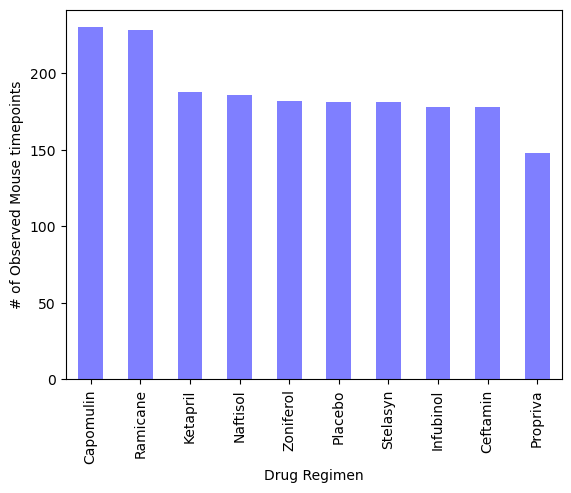

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
number = new_df["Drug Regimen"].value_counts()
number.plot(kind = "bar", color ="blue", xlabel = "Drug Regimen", ylabel = "# of Observed Mouse timepoints",alpha = 0.5)
plt.show()
plt.tight_layout()
number

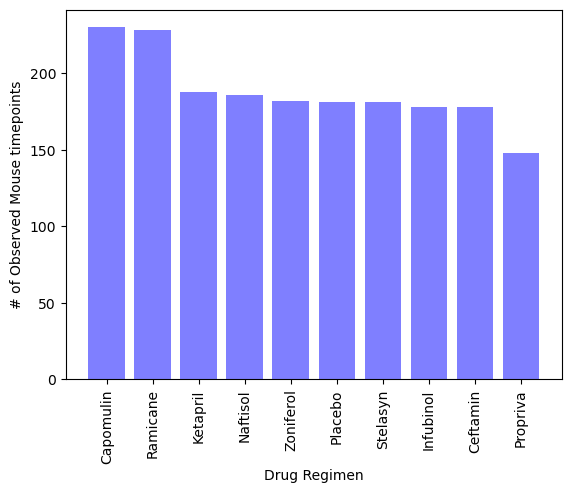

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
number = new_df["Drug Regimen"].value_counts()
x_axis = number.index.values
y_axis = number
plt.bar(x_axis, number, color = "blue", alpha= 0.5)
plt.xticks(rotation = 'vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse timepoints")
plt.show()

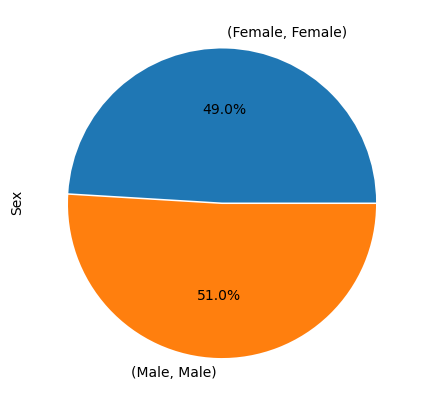

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = new_df.groupby(['Sex'])['Sex'].value_counts()
gender_df.plot(kind = 'pie', autopct='%1.1f%%', figsize=(5, 5), explode = (0,0.01))
plt.show()

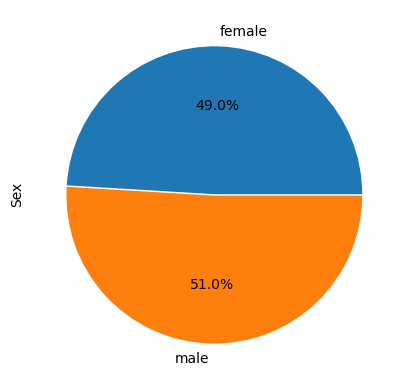

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df,autopct='%1.1f%%',labels = ('female', 'male'), explode = (0,0.01))
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = new_df.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint = greatest_timepoint.reset_index()
timepoint_df = pd.DataFrame(greatest_timepoint)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(new_df,timepoint_df,how = 'right',on = ['Mouse ID','Timepoint'])
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
total_tumor_vol = []



# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]


    # add subset 
    total_tumor_vol.append(tumor_vol)
    
  # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
   
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


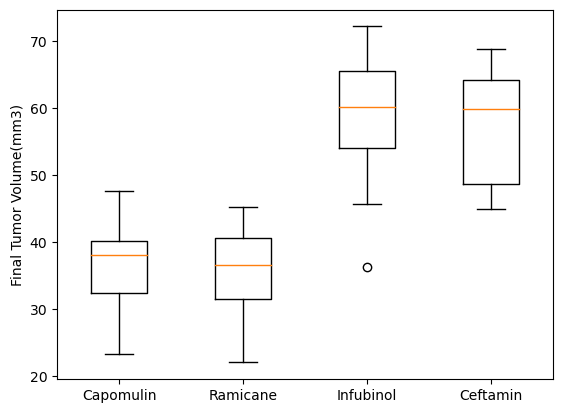

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(total_tumor_vol,vert=True)
plt.ylabel("Final Tumor Volume(mm3)")
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

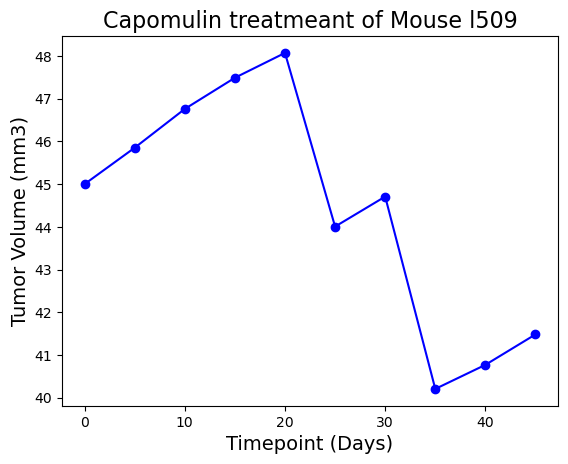

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = new_df.loc[new_df["Drug Regimen"] == "Capomulin"]
single_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509"]
x_axis = single_mouse_df["Timepoint"]
y_axis = single_mouse_df["Tumor Volume (mm3)"]

plt.plot(x_axis,y_axis,marker = "o",color = "blue")
plt.title("Capomulin treatmeant of Mouse l509",fontsize =16)
plt.xlabel("Timepoint (Days)",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)
plt.show()

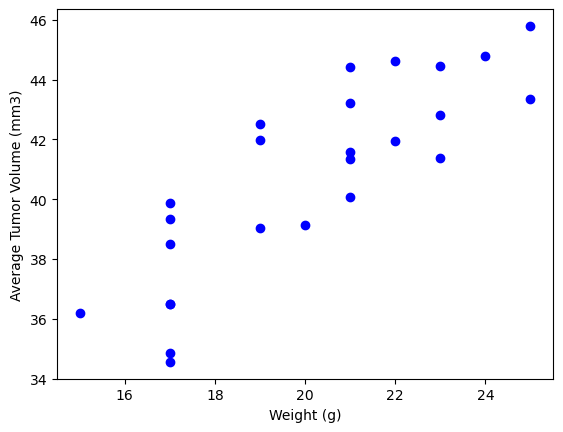

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = new_df.loc[new_df["Drug Regimen"] == "Capomulin"]
avg_vol_df = capomulin_df.groupby(["Mouse ID"]).mean(numeric_only = True)
x_axis = avg_vol_df["Weight (g)"]
y_axis = avg_vol_df["Tumor Volume (mm3)"]
plt.scatter(x_axis,y_axis,color = "blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation coefficient for the entire Capmulin regimen is {round(correlation [0],2)}")

The correlation coefficient for the entire Capmulin regimen is 0.84


y = 0.95x + 21.55


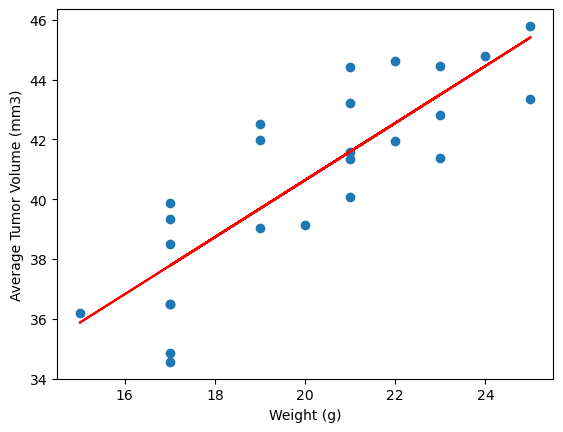

In [19]:
x_values = avg_vol_df["Weight (g)"]
y_values = avg_vol_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()